In [7]:
import numpy as np
import matplotlib.pyplot as plt

Punto 1:

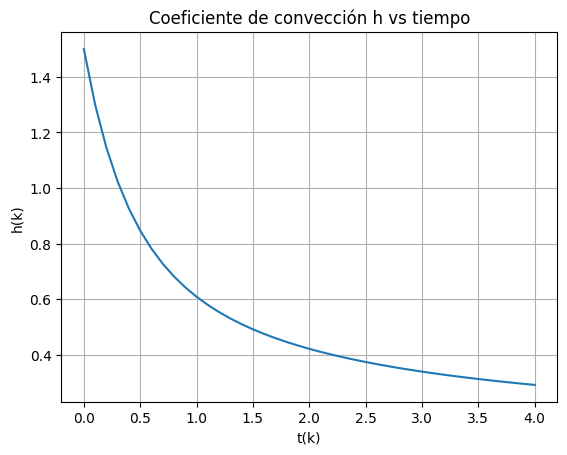

In [9]:
# Parámetros
dy = 1
dt = 0.1
alpha = 1
kf = alpha
N = 40
K = 40

# Mallado
y = np.arange(0, N+1) * dy
t = np.arange(0, K+1) * dt

# Matriz de temperaturas
T = np.zeros((K+1, N+1))

# Condición inicial
T[0,0] = 1
T[0,1:] = 0

# Iteración temporal usando ecuación (3)
for k in range(1, K+1):
    for n in range(1, N):   # n=1..N-1
        T[k,n] = T[k-1,n] + alpha * dt / dy**2 * (T[k-1,n-1] + T[k-1,n+1] - 2*T[k-1,n])
    T[k,0] = 1   # placa caliente
    T[k,N] = 0   # extremo lejano frío

# Calcular derivada ∂T/∂y|0
dTdy = np.zeros(K+1)

for k in range(K+1):
    dTdy[k] = (-3/2*T[k,0] + 2*T[k,1] - 1/2*T[k,2]) / dy

# Cálculo de h(k)
Tp = 1
Tinf = 0
kf = alpha  # dado
h = (-kf * dTdy) / (Tp - Tinf)

# Graficar h vs k
plt.plot(t, h)
plt.xlabel("t(k)")
plt.ylabel("h(k)")
plt.title("Coeficiente de convección h vs tiempo")
plt.grid(True)
plt.show()
